In [235]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from scipy.stats import kruskal
import folium
from folium.plugins import MarkerCluster
from scipy import stats


In [236]:
df = pd.read_csv("./earthquakes.csv", encoding='latin-1', delimiter=";")

In [237]:
#quito columnas que asi a primera vista, no me parecen utiles
df = df.drop(["gap", "id", "net", "status", "locationSource", "magSource", "dmin", "rms", "horizontalError", "depthError", "magError", "magNst", "updated", "nst"], axis=1)
df

,time,latitude,longitude,depth,mag,magType,place,type
0,2023-11-21 00:52,44.4477,6.8597,6.936,4.1,mb,"10 km WSW of Acceglio, Italy",earthquake
1,2023-10-29 16:30,36.8754,-3.4809,10.000,2.8,ml,"4 km S of Lanjarón, Spain",earthquake
2,2023-09-30 08:46,42.7665,-6.2979,10.000,4.0,mb,Spain,earthquake
3,2023-08-28 13:42,42.5778,0.9428,10.018,4.6,mb,"11 km W of Espot, Spain",earthquake
4,2023-06-24 07:45,44.0600,-11.8227,9.882,4.4,mb,"235 km WNW of Mugia, Spain",earthquake
...,...,...,...,...,...,...,...,...
7772,2000-01-03 22:40,42.3270,2.4970,2.000,2.9,ml,"8 km S of Prats de Molló, France",earthquake
7773,2000-01-03 14:48,42.3890,2.4410,2.000,2.6,ml,"3 km WSW of Prats de Molló, France",earthquake
7774,2000-01-03 13:28,42.3210,2.4970,2.000,3.5,ml,"9 km S of Prats de Molló, France",earthquake
7775,2000-01-02 02:25,49.1000,6.8000,1.000,2.5,ml,"1 km E of Macheren, France",earthquake


In [238]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7777 entries, 0 to 7776
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       7777 non-null   object 
 1   latitude   7777 non-null   float64
 2   longitude  7777 non-null   float64
 3   depth      7777 non-null   float64
 4   mag        7777 non-null   float64
 5   magType    7777 non-null   object 
 6   place      7776 non-null   object 
 7   type       7777 non-null   object 
dtypes: float64(4), object(4)
memory usage: 486.2+ KB


### La columna "place" tiene demasiada informacion interesante, como el pais y la ciudad. También, puede que la direccion sea util para un analisis futuro, asi que también me quedo con esta informacion y creo 3 columnas a partir de "place" ###


In [239]:

df['place'] = df['place'].astype(str)

# Inicializar nuevas columnas
df['direccion'] = ''
df['ciudad'] = ''
df['pais'] = ''

# Iterar sobre las filas del DataFrame
for index, row in df.iterrows():
    partes = row['place'].split(', ')
    if len(partes) == 2:
        # Se proporciona la ciudad y el país
        direccion_ciudad, pais = partes
        direccion, ciudad = direccion_ciudad.split(' of ')
    else:
        # Solo se proporciona el país
        direccion = ''
        ciudad = ''
        pais = partes[0]

    # Asignar los resultados a las nuevas columnas
    df.at[index, 'direccion'] = direccion
    df.at[index, 'ciudad'] = ciudad
    df.at[index, 'pais'] = pais

# Eliminar la columna original 'place' si ya no la necesitas
df = df.drop('place', axis=1)

df

,time,latitude,longitude,depth,mag,magType,type,direccion,ciudad,pais
0,2023-11-21 00:52,44.4477,6.8597,6.936,4.1,mb,earthquake,10 km WSW,Acceglio,Italy
1,2023-10-29 16:30,36.8754,-3.4809,10.000,2.8,ml,earthquake,4 km S,Lanjarón,Spain
2,2023-09-30 08:46,42.7665,-6.2979,10.000,4.0,mb,earthquake,,,Spain
3,2023-08-28 13:42,42.5778,0.9428,10.018,4.6,mb,earthquake,11 km W,Espot,Spain
4,2023-06-24 07:45,44.0600,-11.8227,9.882,4.4,mb,earthquake,235 km WNW,Mugia,Spain
...,...,...,...,...,...,...,...,...,...,...
7772,2000-01-03 22:40,42.3270,2.4970,2.000,2.9,ml,earthquake,8 km S,Prats de Molló,France
7773,2000-01-03 14:48,42.3890,2.4410,2.000,2.6,ml,earthquake,3 km WSW,Prats de Molló,France
7774,2000-01-03 13:28,42.3210,2.4970,2.000,3.5,ml,earthquake,9 km S,Prats de Molló,France
7775,2000-01-02 02:25,49.1000,6.8000,1.000,2.5,ml,earthquake,1 km E,Macheren,France


In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7777 entries, 0 to 7776
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       7777 non-null   object 
 1   latitude   7777 non-null   float64
 2   longitude  7777 non-null   float64
 3   depth      7777 non-null   float64
 4   mag        7777 non-null   float64
 5   magType    7777 non-null   object 
 6   type       7777 non-null   object 
 7   direccion  7777 non-null   object 
 8   ciudad     7777 non-null   object 
 9   pais       7777 non-null   object 
dtypes: float64(4), object(6)
memory usage: 607.7+ KB


#### -> Hay una columna llamada "time" con fecha y hora.

In [240]:
df['time'] = pd.to_datetime(df['time'])
# Extraer la hora del día
df['hour_of_day'] = df['time'].dt.hour

df

,time,latitude,longitude,depth,mag,magType,type,direccion,ciudad,pais,hour_of_day
0,2023-11-21 00:52:00,44.4477,6.8597,6.936,4.1,mb,earthquake,10 km WSW,Acceglio,Italy,0
1,2023-10-29 16:30:00,36.8754,-3.4809,10.000,2.8,ml,earthquake,4 km S,Lanjarón,Spain,16
2,2023-09-30 08:46:00,42.7665,-6.2979,10.000,4.0,mb,earthquake,,,Spain,8
3,2023-08-28 13:42:00,42.5778,0.9428,10.018,4.6,mb,earthquake,11 km W,Espot,Spain,13
4,2023-06-24 07:45:00,44.0600,-11.8227,9.882,4.4,mb,earthquake,235 km WNW,Mugia,Spain,7
...,...,...,...,...,...,...,...,...,...,...,...
7772,2000-01-03 22:40:00,42.3270,2.4970,2.000,2.9,ml,earthquake,8 km S,Prats de Molló,France,22
7773,2000-01-03 14:48:00,42.3890,2.4410,2.000,2.6,ml,earthquake,3 km WSW,Prats de Molló,France,14
7774,2000-01-03 13:28:00,42.3210,2.4970,2.000,3.5,ml,earthquake,9 km S,Prats de Molló,France,13
7775,2000-01-02 02:25:00,49.1000,6.8000,1.000,2.5,ml,earthquake,1 km E,Macheren,France,2


### MAGNITUD EN ESCALA RICHTER / EFECTOS DEL TERREMOTO
#### Magnitud 5,0 - 5,9: terremotos moderados. Puede causar daños mayores en edificaciones débiles o mal construidas. En edificaciones bien diseñadas los daños son leves. Se producen 800 al año en el mundo. (fuente: National Geographic)

In [171]:
df_mag_5 = df[df['mag'] >= 5]
df_mag_5

,time,latitude,longitude,depth,mag,magType,type,direccion,ciudad,pais,hour_of_day
28,2022-03-19 05:59:00,36.8470,5.1868,10.00,5.2,mww,earthquake,13 km NE,Bejaïa,Algeria,5
52,2021-03-17 20:17:00,36.9107,5.3143,10.00,5.0,mww,earthquake,26 km NE,Bejaïa,Algeria,20
54,2021-03-17 20:04:00,36.9206,5.2014,8.00,6.0,mww,earthquake,21 km NNE,Bejaïa,Algeria,20
65,2020-11-21 22:53:00,36.6442,6.8625,10.00,5.1,mww,earthquake,24 km WSW,Azzaba,Algeria,22
75,2020-08-07 02:15:00,36.5497,6.2708,10.00,5.0,mww,earthquake,3 km NNE,Sidi Mérouane,Algeria,2
81,2020-03-26 03:09:00,35.8680,5.7575,10.00,5.0,mww,earthquake,21 km WNW,Draa Klalouche,Algeria,3
162,2016-05-28 19:54:00,36.4313,3.5166,11.43,5.4,mww,earthquake,16 km SSW,Lakhdaria,Algeria,19
172,2016-03-15 00:40:00,35.6879,-3.6340,10.00,5.2,mww,earthquake,55 km NNE,Al Hoceïma,Morocco,0
177,2016-03-10 23:16:00,35.6992,-3.5952,10.00,5.0,mww,earthquake,58 km NNE,Al Hoceïma,Morocco,23
184,2016-02-21 22:46:00,35.7375,-3.5108,10.00,5.1,mww,earthquake,66 km NE,Al Hoceïma,Morocco,22


### MAGNITUD EN ESCALA RICHTER / EFECTOS DEL TERREMOTO
#### Magnitud 6,0 - 6,9: terremotos fuertes. Pueden destruir áreas pobladas en hasta unos 160 kilómetros a la redonda. Se producen 120 al año (fuente: National Geographic)

In [172]:
df_mag_6 = df[df['mag'] >= 6]
df_mag_6

,time,latitude,longitude,depth,mag,magType,type,direccion,ciudad,pais,hour_of_day
54,2021-03-17 20:04:00,36.9206,5.2014,8.0,6.0,mww,earthquake,21 km NNE,Bejaïa,Algeria,20
194,2016-01-24 23:22:00,35.6493,-3.6818,12.0,6.3,mww,earthquake,49 km NNE,Al Hoceïma,Morocco,23
360,2010-04-11 18:08:00,36.9650,-3.5420,609.8,6.3,mwc,earthquake,1 km S,Nigüelas,Spain,18
1928,2007-02-12 05:35:00,35.8040,-10.3120,20.0,6.0,mwc,earthquake,181 km SW,Sagres,Portugal,5
5290,2003-05-21 14:44:00,36.9640,3.6340,12.0,6.8,mwc,earthquake,25 km WNW,Dellys,Algeria,14


In [232]:
estadisticas_por_pais = df.groupby('pais')['mag'].describe()


In [233]:
estadisticas_por_pais 

,count,mean,std,min,25%,50%,75%,max
pais,,,,,,,,
Algeria,904.0,3.611726,0.663371,2.5,3.100,3.60,4.100,6.8
Andorra,5.0,3.040000,0.466905,2.5,2.800,2.90,3.300,3.7
Azores-Cape St. Vincent Ridge,137.0,3.849635,0.572164,2.5,3.400,3.90,4.300,5.5
Bay of Biscay,1.0,3.200000,NaN,3.2,3.200,3.20,3.200,3.2
Belgium,43.0,2.895349,0.457193,2.5,2.600,2.80,3.000,4.8
France,2027.0,2.852935,0.418247,2.5,2.600,2.70,3.000,5.2
Germany,789.0,2.897845,0.373532,2.5,2.600,2.80,3.100,4.8
Italy,804.0,2.784204,0.367261,2.5,2.500,2.70,2.900,4.9
Ligurian Sea,1.0,2.500000,NaN,2.5,2.500,2.50,2.500,2.5


#### ->Podemo observar aqui cuantos terremotos hay en cada pais, con la maxima magnitud.

In [241]:
filas_con_jersey = df[df['pais'] == 'Jersey']
filas_con_jersey

,time,latitude,longitude,depth,mag,magType,type,direccion,ciudad,pais,hour_of_day
216,2015-02-25 17:55:00,49.000,-2.400,2.0,3.7,ml,earthquake,30 km SW,Saint Helier,Jersey,17
239,2014-07-11 07:54:00,49.151,-2.419,12.4,3.9,mb,earthquake,23 km W,Saint Helier,Jersey,7
5712,2002-11-19 16:15:00,48.983,-2.064,10.0,3.4,ml,earthquake,22 km S,Saint Helier,Jersey,16


##### si no recuerdo mal mi geografia, no quitar las filas con "Jersey" porque entre France y England.



In [200]:



# Realizar el análisis de varianza (ANOVA)
resultado_anova = f_oneway(*[grupo['mag'] for nombre, grupo in df.groupby('pais')])

# Imprimir el resultado
print("Estadísticas de prueba ANOVA:", resultado_anova.statistic)
print("Valor p:", resultado_anova.pvalue)

# Interpretar el resultado
nivel_significancia = 0.05
if resultado_anova.pvalue < nivel_significancia:
    print("Hay evidencia estadística para rechazar la hipótesis nula. Existe una relación significativa.")
else:
    print("No hay evidencia estadística para rechazar la hipótesis nula. No se puede afirmar una relación significativa.")

Estadísticas de prueba ANOVA: 96.8700526762017
Valor p: 0.0
Hay evidencia estadística para rechazar la hipótesis nula. Existe una relación significativa.


#### -> Segun este dataset, existe une relacion estadisticamente significativa entre la magnitud de un terremoto y el pais.

In [23]:
estadisticas_por_ciudad = df.groupby('ciudad')['mag'].describe()
estadisticas_por_ciudad

,count,mean,std,min,25%,50%,75%,max
ciudad,,,,,,,,
,341.0,3.449560,0.724432,2.5,2.800,3.40,4.000,5.8
A dos Francos,1.0,2.600000,NaN,2.6,2.600,2.60,2.600,2.6
Aachen,2.0,3.400000,0.141421,3.3,3.350,3.40,3.450,3.5
Abajas,1.0,2.500000,NaN,2.5,2.500,2.50,2.500,2.5
Abanilla,2.0,3.350000,0.919239,2.7,3.025,3.35,3.675,4.0
...,...,...,...,...,...,...,...,...
Étaules,1.0,3.600000,NaN,3.6,3.600,3.60,3.600,3.6
Étretat,3.0,3.066667,0.503322,2.6,2.800,3.00,3.300,3.6
Évaux-les-Bains,1.0,3.000000,NaN,3.0,3.000,3.00,3.000,3.0


In [94]:
#analisis con una variable categórica (ciudad) y una variable numérica (hora),


# Realizar el análisis de varianza (ANOVA)
resultado_anova = f_oneway(*[grupo['mag'] for nombre, grupo in df.groupby('ciudad')])

# Imprimir el resultado
print("Estadísticas de prueba ANOVA:", resultado_anova.statistic)
print("Valor p:", resultado_anova.pvalue)

# Interpretar el resultado
nivel_significancia = 0.05
if resultado_anova.pvalue < nivel_significancia:
    print("Existe una relación significativa.")
else:
    print("No se puede afirmar una relación significativa.")

Estadísticas de prueba ANOVA: 2.035605461034922
Valor p: 6.97417459043944e-97
Existe una relación significativa.


#### -> Segun este dataset, existe une relacion estadisticamente significativa entre la magnitud de un terremoto y la ciudad. Las magnitudes de los terremotos varían de manera significativa entre las diferentes ciudades.


In [133]:
df_ordenado = df.sort_values(by='mag', ascending=False)
# Seleccionar las 20 primeras filas
top_10_ciudades_mayor_magnitud = df_ordenado.head(30)
top_10_ciudades_mayor_magnitud

,time,latitude,longitude,depth,mag,magType,type,direccion,ciudad,pais,hour_of_day,mag_sup_5,mag_sup_6,Region
5290,2003-05-21 14:44:00,36.9640,3.6340,12.00,6.8,mwc,earthquake,25 km WNW,Dellys,Algeria,14,Yes,Yes,Otro
360,2010-04-11 18:08:00,36.9650,-3.5420,609.80,6.3,mwc,earthquake,1 km S,Nigüelas,Spain,18,Yes,Yes,Andalucia
194,2016-01-24 23:22:00,35.6493,-3.6818,12.00,6.3,mww,earthquake,49 km NNE,Al Hoceïma,Morocco,23,Yes,Yes,Otro
1928,2007-02-12 05:35:00,35.8040,-10.3120,20.00,6.0,mwc,earthquake,181 km SW,Sagres,Portugal,5,Yes,No,Otro
54,2021-03-17 20:04:00,36.9206,5.2014,8.00,6.0,mww,earthquake,21 km NNE,Bejaïa,Algeria,20,Yes,No,Otro
5093,2003-05-27 13:11:00,36.9390,3.5780,8.00,5.8,mwb,earthquake,,,northern Algeria,13,Yes,No,Otro
7207,2000-11-10 15:10:00,36.6010,4.7730,10.00,5.7,mwc,earthquake,5 km S,el hed,Algeria,15,Yes,No,Otro
5289,2003-05-21 14:51:00,36.9700,3.8130,10.00,5.7,mb,earthquake,10 km WNW,Dellys,Algeria,14,Yes,No,Otro
370,2009-12-16 20:37:00,36.4630,-9.9000,19.80,5.6,mwc,earthquake,104 km SW,Sagres,Portugal,20,Yes,No,Otro
832,2008-06-06 16:02:00,35.8830,-0.6580,4.00,5.5,mwc,earthquake,17 km NNE,Mers el Kebir,Algeria,16,Yes,No,Otro


*-> Si queremos echar un ojo a esta relacion, observamos por ejemplo que Dellys aparece varias veces con terremotos de fuerte magnitud.*

In [53]:
# Calcular la correlación y el valor p
correlacion, valor_p = pearsonr(df['mag'], df['depth'])

# Imprimir los resultados
print(f"Coeficiente de correlación: {correlacion}")
print(f"Valor p: {valor_p}")

# Interpretar el resultado
nivel_significancia = 0.05
if valor_p < nivel_significancia and correlacion < 0.40:
    print("No hay correlacion lineal. Y la p-value lo confirma.")
else:
    print("No hay evidencia estadística para rechazar la hipótesis nula. No se puede afirmar una relación significativa.")



Coeficiente de correlación: 0.09644802331449624
Valor p: 1.5413437511464418e-17
No hay correlacion lineal. Y la p-value lo confirma.


#### -> El coeficiente de correlación cercano a cero sugiere que la magnitud y la profundidad no están fuertemente relacionadas de manera lineal.

In [95]:
resultado_anova = f_oneway(*[grupo['time'] for nombre, grupo in df.groupby('ciudad')])

# Imprimir el resultado
print("Estadísticas de prueba ANOVA:", resultado_anova.statistic)
print("Valor p:", resultado_anova.pvalue)

# Interpretar el resultado
nivel_significancia = 0.05
if resultado_anova.pvalue < nivel_significancia:
    print("Existe una relación significativa.")
else:
    print("No se puede afirmar una relación significativa")

Estadísticas de prueba ANOVA: 2.6333931000719915
Valor p: 1.216456509758136e-181
Existe una relación significativa.


In [97]:
# Realizar la prueba de Kruskal-Wallis
resultado_kruskal = kruskal(*[grupo['hour_of_day'] for nombre, grupo in df.groupby('ciudad')])

# Imprimir el resultado
print("Estadísticas de prueba Kruskal-Wallis:", resultado_kruskal.statistic)
print("Valor p:", resultado_kruskal.pvalue)

# Interpretar el resultado
nivel_significancia = 0.05
if resultado_kruskal.pvalue < nivel_significancia:
    print("Existe una relación significativa.")
else:
    print("No se puede afirmar una relación significativa.")

Estadísticas de prueba Kruskal-Wallis: 2315.200012917246
Valor p: 0.048707773988479024
Existe una relación significativa.


*->existe una relacion estadisticamente significativa entre la hora del terremoto y la ciudad*
*-> Puedo que el test ANOVA no esté adaptado, asi que hago un test KRUSKAL-WALLIS pero sale la misma observacion*
-> cambia la hora del terremoto en funcion de la ciudad

In [98]:
resultado_anova = f_oneway(*[grupo['hour_of_day'] for nombre, grupo in df.groupby('pais')])

# Imprimir el resultado
print("Estadísticas de prueba ANOVA:", resultado_anova.statistic)
print("Valor p:", resultado_anova.pvalue)

# Interpretar el resultado
nivel_significancia = 0.05
if resultado_anova.pvalue < nivel_significancia:
    print("Existe una relación significativa.")
else:
    print("No se puede afirmar una relación significativa")

Estadísticas de prueba ANOVA: 2.7361955784999727
Valor p: 3.3365884365722135e-06
Existe una relación significativa.


In [91]:
# Realizar la prueba de Kruskal-Wallis
resultado_kruskal = kruskal(*[grupo['hour_of_day'] for nombre, grupo in df.groupby('pais')])

# Imprimir el resultado
print("Estadísticas de prueba Kruskal-Wallis:", resultado_kruskal.statistic)
print("Valor p:", resultado_kruskal.pvalue)

# Interpretar el resultado
nivel_significancia = 0.05
if resultado_kruskal.pvalue < nivel_significancia:
    print("Existe una relación significativa.")
else:
    print("No se puede afirmar una relación significativa.")

Estadísticas de prueba Kruskal-Wallis: 73.63712989784243
Valor p: 3.346354784615007e-06
Existe una relación significativa.


*->existe una relacion estadisticamente significativa entre la hora del terremoto y el pais*
*-> Puedo que el test ANOVA no esté adaptado, asi que hago un test KRUSKAL-WALLIS pero sale la misma observacion*
-> cambia la hora del terremoto en funcion del pais -> hay diferencias estadísticamente significativas en las horas del terremoto entre los diferentes paises.

In [84]:
# Calcular la correlación de Pearson
correlacion, valor_p = pearsonr(df['mag'], df['hour_of_day'])

# Imprimir los resultados
print("Correlación de Pearson:", correlacion)
print("Valor p:", valor_p)

# Interpretar los resultados
nivel_significancia = 0.05
if valor_p < nivel_significancia:
    print("Existe una correlación estadísticamente significativa entre la magnitud y la hora del día.")
else:
    print("No hay evidencia estadística para afirmar una correlación significativa.")

Correlación de Pearson: 0.0035058787144486916
Valor p: 0.7572262654965114
No hay evidencia estadística para afirmar una correlación significativa.


#### -> No hay relacion estadisticamente significativa entre la hora y la magnitud de un terremoto (lo que parece logico).

In [104]:
terremotos_sagres = df[(df['ciudad'] == 'Sagres') & (df['mag'] > 5)]
terremotos_sagres 

,time,latitude,longitude,depth,mag,magType,type,direccion,ciudad,pais,hour_of_day
370,2009-12-16 20:37:00,36.463,-9.900,19.8,5.6,mwc,earthquake,104 km SW,Sagres,Portugal,20
1928,2007-02-12 05:35:00,35.804,-10.312,20.0,6.0,mwc,earthquake,181 km SW,Sagres,Portugal,5
4825,2003-07-29 01:31:00,35.694,-10.565,10.0,5.4,mwc,earthquake,206 km SW,Sagres,Portugal,1


-> para enseñar que los terremotos pueden volver a ocurrir en el mismo sitio (en este ejemplo Sagres).

In [197]:
df['mag_sup_5'] = df['mag'].apply(lambda x: 'Yes' if x >= 5 else 'No')

df['mag_sup_6'] = df['mag'].apply(lambda x: 'Yes' if x >= 6 else 'No')
df

,time,latitude,longitude,depth,mag,magType,type,direccion,ciudad,pais,hour_of_day,mag_sup_5,mag_sup_6
0,2023-11-21 00:52:00,44.4477,6.8597,6.936,4.1,mb,earthquake,10 km WSW,Acceglio,Italy,0,No,No
1,2023-10-29 16:30:00,36.8754,-3.4809,10.000,2.8,ml,earthquake,4 km S,Lanjarón,Spain,16,No,No
2,2023-09-30 08:46:00,42.7665,-6.2979,10.000,4.0,mb,earthquake,,,Spain,8,No,No
3,2023-08-28 13:42:00,42.5778,0.9428,10.018,4.6,mb,earthquake,11 km W,Espot,Spain,13,No,No
4,2023-06-24 07:45:00,44.0600,-11.8227,9.882,4.4,mb,earthquake,235 km WNW,Mugia,Spain,7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,2000-01-03 22:40:00,42.3270,2.4970,2.000,2.9,ml,earthquake,8 km S,Prats de Molló,France,22,No,No
7773,2000-01-03 14:48:00,42.3890,2.4410,2.000,2.6,ml,earthquake,3 km WSW,Prats de Molló,France,14,No,No
7774,2000-01-03 13:28:00,42.3210,2.4970,2.000,3.5,ml,earthquake,9 km S,Prats de Molló,France,13,No,No
7775,2000-01-02 02:25:00,49.1000,6.8000,1.000,2.5,ml,earthquake,1 km E,Macheren,France,2,No,No


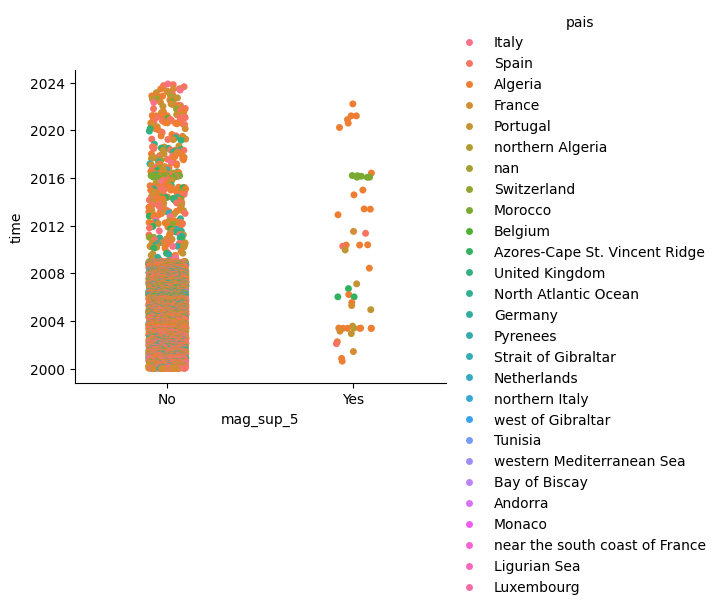

In [198]:
sns.catplot(x = "mag_sup_5", y = "time", hue = "pais", data = df, kind = "strip");
plt.savefig("./EDA_fig_mag5.png")

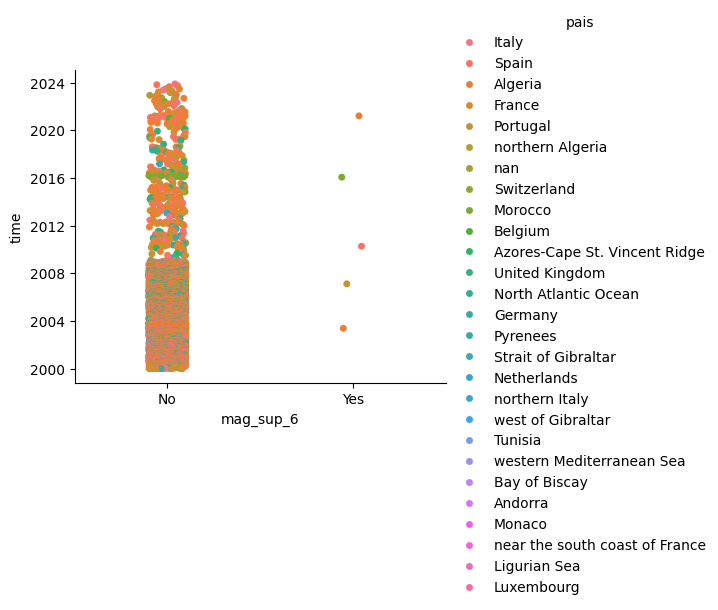

In [199]:
sns.catplot(x = "mag_sup_6", y = "time", hue = "pais", data = df, kind = "strip");
plt.savefig("./EDA_fig_mag6.png")

In [255]:
df['Region'] = 'Otro'  # Valor predeterminado para ciudades que no coinciden con las condiciones

# Condiciones para Andalucía
andalucia_lat_range = (35.94, 38.73)
andalucia_lon_range = (-7.52, -1.63)

#fuente para Andalucia : http://www.ideandalucia.es/catalogo/inspire/srv/api/records/5d0b5e73-c924-401d-ab72-ae0fa597f4be_200032_es


df.loc[(df['latitude'].between(*andalucia_lat_range)) & (df['longitude'].between(*andalucia_lon_range)), 'Region'] = 'Andalucia'

# Condiciones para los Pirineos
pyreneos_lat_range = (42.0, 43.5)
pyreneos_lon_range = (0.0, 2.5)
df.loc[(df['latitude'].between(*pyreneos_lat_range)) & (df['longitude'].between(*pyreneos_lon_range)), 'Region'] = 'Pyreneos'

df

,time,latitude,longitude,depth,mag,magType,type,direccion,ciudad,pais,hour_of_day,Region
0,2023-11-21 00:52:00,44.4477,6.8597,6.936,4.1,mb,earthquake,10 km WSW,Acceglio,Italy,0,Otro
1,2023-10-29 16:30:00,36.8754,-3.4809,10.000,2.8,ml,earthquake,4 km S,Lanjarón,Spain,16,Andalucia
2,2023-09-30 08:46:00,42.7665,-6.2979,10.000,4.0,mb,earthquake,,,Spain,8,Otro
3,2023-08-28 13:42:00,42.5778,0.9428,10.018,4.6,mb,earthquake,11 km W,Espot,Spain,13,Pyreneos
4,2023-06-24 07:45:00,44.0600,-11.8227,9.882,4.4,mb,earthquake,235 km WNW,Mugia,Spain,7,Otro
...,...,...,...,...,...,...,...,...,...,...,...,...
7772,2000-01-03 22:40:00,42.3270,2.4970,2.000,2.9,ml,earthquake,8 km S,Prats de Molló,France,22,Pyreneos
7773,2000-01-03 14:48:00,42.3890,2.4410,2.000,2.6,ml,earthquake,3 km WSW,Prats de Molló,France,14,Pyreneos
7774,2000-01-03 13:28:00,42.3210,2.4970,2.000,3.5,ml,earthquake,9 km S,Prats de Molló,France,13,Pyreneos
7775,2000-01-02 02:25:00,49.1000,6.8000,1.000,2.5,ml,earthquake,1 km E,Macheren,France,2,Otro


-> esto sirve para atribuir la region (Andalucia o Pyreneos exclusivamente)

In [203]:
terremotos_andalucia = df[(df['Region'] == 'Andalucia') & (df['mag'] > 5)]
terremotos_andalucia

,time,latitude,longitude,depth,mag,magType,type,direccion,ciudad,pais,hour_of_day,mag_sup_5,mag_sup_6,Region
323,2011-05-11 12:47:00,37.699,-1.672,1.0,5.1,mwr,earthquake,4 km NE,Lorca,Spain,12,Yes,No,Andalucia
360,2010-04-11 18:08:00,36.965,-3.542,609.8,6.3,mwc,earthquake,1 km S,Nigüelas,Spain,18,Yes,Yes,Andalucia
5683,2002-12-10 08:51:00,36.195,-7.472,10.0,5.2,mwc,earthquake,98 km SSE,Olhão,Portugal,8,Yes,No,Andalucia


usar eso para ejemplo Lorca, 2011, mag= 5.1

In [135]:
terremotos_espana = df[df['pais'] == 'Spain']
terremotos_espana.count()

time           1833
latitude       1833
longitude      1833
depth          1833
mag            1833
magType        1833
type           1833
direccion      1833
ciudad         1833
pais           1833
hour_of_day    1833
mag_sup_5      1833
mag_sup_6      1833
Region         1833
dtype: int64

In [242]:
df.count()


time           7777
latitude       7777
longitude      7777
depth          7777
mag            7777
magType        7777
type           7777
direccion      7777
ciudad         7777
pais           7777
hour_of_day    7777
dtype: int64

In [243]:
print("El porcentaje de terremotos en España en este dataset es", round(1833*100/7777,2), "%")

El porcentaje de terremotos en España en este dataset es 23.57 %


In [222]:
terremotos_france = df[df['pais'] == 'France']
terremotos_france.count()

time                2027
latitude            2027
longitude           2027
depth               2027
mag                 2027
magType             2027
type                2027
direccion           2027
ciudad              2027
pais                2027
hour_of_day         2027
mag_sup_5           2027
mag_sup_6           2027
Region              2027
city_ocurrencias    2027
dtype: int64

In [253]:
terremotos_espana_2022_23 = df[(df['pais'] == 'Spain') & (df['time'].dt.year == 2022) | (df['time'].dt.year == 2023)]

# Contar la cantidad de terremotos
cantidad_terremotos_espana_2022_23 = len(terremotos_espana_2022_23)

print(f"Cantidad de terremotos en España en 2022 y 2023: {cantidad_terremotos_espana_2022_23}")

Cantidad de terremotos en España en 2022 y 2023: 15


In [250]:
terremotos_espana_2022_23

,time,latitude,longitude,depth,mag,magType,type,direccion,ciudad,pais,hour_of_day
0,2023-11-21 00:52:00,44.4477,6.8597,6.936,4.1,mb,earthquake,10 km WSW,Acceglio,Italy,0
1,2023-10-29 16:30:00,36.8754,-3.4809,10.000,2.8,ml,earthquake,4 km S,Lanjarón,Spain,16
2,2023-09-30 08:46:00,42.7665,-6.2979,10.000,4.0,mb,earthquake,,,Spain,8
3,2023-08-28 13:42:00,42.5778,0.9428,10.018,4.6,mb,earthquake,11 km W,Espot,Spain,13
4,2023-06-24 07:45:00,44.0600,-11.8227,9.882,4.4,mb,earthquake,235 km WNW,Mugia,Spain,7
5,2023-06-18 22:06:00,36.6354,4.7031,10.000,3.8,mb,earthquake,6 km WSW,el hed,Algeria,22
6,2023-06-16 22:27:00,46.2995,-1.0212,5.000,3.9,mb,earthquake,2 km WSW,Marans,France,22
7,2023-06-16 12:38:00,46.2145,-0.7295,5.000,4.8,mww,earthquake,5 km WNW,Mauzé-sur-le-Mignon,France,12
8,2023-05-16 02:24:00,44.5555,6.8110,8.462,4.1,mb,earthquake,16 km W,Pleyne,Italy,2
9,2023-04-17 09:28:00,42.9790,0.3442,10.000,4.0,mb,earthquake,11 km SSW,La Barthe-de-Neste,France,9


In [245]:
def compara_multi(df, num_col1, num_col2, cat_col=None, size=None, escala=1):
    # Crear un mapa folium centrado en las coordenadas medias
    mapa = folium.Map(location=[df[num_col2].mean(), df[num_col1].mean()], zoom_start=5)

    # Crear un clúster de marcadores para agregar puntos al mapa
    marker_cluster = MarkerCluster().add_to(mapa)

    # Agregar marcadores al clúster
    for index, row in df.iterrows():
        folium.Marker([row['latitude'], row['longitude']], popup=f"{num_col1}: {row[num_col1]}, {num_col2}: {row[num_col2]}", icon=None).add_to(marker_cluster)

    # Guardar el mapa como un archivo HTML
    mapa.save("mapa_Europa_Oeste_Magreb.html")
    
compara_multi(df, 'longitude', 'latitude', cat_col='pais', size="mag", escala=1)

In [252]:
terremotos = df[(df['time'].dt.year == 2022) | (df['time'].dt.year == 2023)]

# Contar la cantidad de terremotos
cantidad_terremotos= len(terremotos)

print(f"Cantidad de terremotos total en 2023: {cantidad_terremotos}")

Cantidad de terremotos total en 2023: 35


In [224]:


def compara_multi(df, num_col1, num_col2, cat_col=None, size=None, escala=1, min_mag=None, max_mag=None):
    # Filtrar terremotos con magnitud en el rango especificado
    if min_mag is not None and max_mag is not None:
        df = df[(df[size] >= min_mag) & (df[size] <= max_mag)]

    # Crear un mapa folium centrado en las coordenadas medias
    mapa = folium.Map(location=[df[num_col2].mean(), df[num_col1].mean()], zoom_start=5)

    # Crear un clúster de marcadores para agregar puntos al mapa
    marker_cluster = MarkerCluster().add_to(mapa)

    # Agregar marcadores al clúster
    for index, row in df.iterrows():
        folium.Marker([row[num_col2], row[num_col1]], popup=f"{num_col1}: {row[num_col1]}, {num_col2}: {row[num_col2]}, Magnitud: {row[size]}", icon=None).add_to(marker_cluster)

    # Guardar el mapa como un archivo HTML
    mapa.save("mapa_terremotos.html")

# Uso de la función con filtrado por magnitud entre 5 y 5.9
compara_multi(df, 'longitude', 'latitude', cat_col='country', size="mag", escala=1, min_mag=5, max_mag=5.9)

In [225]:

def compara_multi(df, num_col1, num_col2, cat_col=None, size=None, escala=1, min_mag=None, max_mag=None):
    # Filtrar terremotos con magnitud en el rango especificado
    if min_mag is not None and max_mag is not None:
        df = df[(df[size] >= min_mag) & (df[size] <= max_mag)]

    # Crear un mapa folium centrado en las coordenadas medias
    mapa = folium.Map(location=[df[num_col2].mean(), df[num_col1].mean()], zoom_start=5)

    # Crear un clúster de marcadores para agregar puntos al mapa
    marker_cluster = MarkerCluster().add_to(mapa)

    # Agregar marcadores al clúster
    for index, row in df.iterrows():
        folium.Marker([row[num_col2], row[num_col1]], popup=f"{num_col1}: {row[num_col1]}, {num_col2}: {row[num_col2]}, Magnitud: {row[size]}", icon=None).add_to(marker_cluster)

    # Guardar el mapa como un archivo HTML
    mapa.save("mapa_terremotos2.html")

# Uso de la función con filtrado por magnitud entre 5 y 5.9
compara_multi(df, 'longitude', 'latitude', cat_col='country', size="mag", escala=1, min_mag=6, max_mag=6.9)

In [196]:
terremotos_mag6 = df[df['mag'] >= 6]
terremotos_mag6

,time,latitude,longitude,depth,mag,magType,type,direccion,ciudad,pais,hour_of_day,mag_sup_5,mag_sup_6
54,2021-03-17 20:04:00,36.9206,5.2014,8.0,6.0,mww,earthquake,21 km NNE,Bejaïa,Algeria,20,Yes,No
194,2016-01-24 23:22:00,35.6493,-3.6818,12.0,6.3,mww,earthquake,49 km NNE,Al Hoceïma,Morocco,23,Yes,Yes
360,2010-04-11 18:08:00,36.9650,-3.5420,609.8,6.3,mwc,earthquake,1 km S,Nigüelas,Spain,18,Yes,Yes
1928,2007-02-12 05:35:00,35.8040,-10.3120,20.0,6.0,mwc,earthquake,181 km SW,Sagres,Portugal,5,Yes,No
5290,2003-05-21 14:44:00,36.9640,3.6340,12.0,6.8,mwc,earthquake,25 km WNW,Dellys,Algeria,14,Yes,Yes


In [227]:

# Filtrar terremotos en Andalucía y en el resto de España
terremotos_andalucia = df[df['Region'] == 'Andalucia']
terremotos_resto_espana = df[df['Region'] != 'Andalucia']

# Realizar la prueba t de dos muestras
resultado_ttest = stats.ttest_ind(terremotos_andalucia['mag'], terremotos_resto_espana['mag'], equal_var=False)

# Imprimir el resultado
print("Estadísticas de prueba t:", resultado_ttest.statistic)
print("Valor p:", resultado_ttest.pvalue)

# Interpretar el resultado
nivel_significancia = 0.05
if resultado_ttest.pvalue < nivel_significancia:
    print("Hay una diferencia significativa en las magnitudes entre Andalucía y el resto de España.")
else:
    print("No se puede afirmar una diferencia significativa en las magnitudes.")

Estadísticas de prueba t: -2.32856400090182
Valor p: 0.020096148897251358
Hay una diferencia significativa en las magnitudes entre Andalucía y el resto de España.


In [261]:
from scipy.stats import mannwhitneyu
grupo_a = df.loc[df.Region == "Andalucia"]["mag"]
grupo_b = df.loc[df.Region == "Otro"]["mag"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

# Interpretar el resultado
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Rechazamos la hipótesis nula y entonces hay diferencia significativa (=hay relación entre los valores de la categórica y los de la numérica) -> Hay una diferencia significativa en las magnitudes entre Andalucía y el resto de España(exluyendo a los Pirineos).")
else:
    print("No se puede afirmar una diferencia significativa en las magnitudes.")


Estadístico U: 2340643.0
Valor p: 0.03245766750164024
Rechazamos la hipótesis nula y entonces hay diferencia significativa (=hay relación entre los valores de la categórica y los de la numérica) -> Hay una diferencia significativa en las magnitudes entre Andalucía y el resto de España(exluyendo a los Pirineos).


In [256]:

# Filtrar terremotos en los Pireneos y en el resto de España
terremotos_andalucia = df[df['Region'] == 'Pyreneos']
terremotos_resto_espana = df[df['Region'] != 'Pyreneos']

# Realizar la prueba t de dos muestras
resultado_ttest = stats.ttest_ind(terremotos_andalucia['mag'], terremotos_resto_espana['mag'], equal_var=False)

# Imprimir el resultado
print("Estadísticas de prueba t:", resultado_ttest.statistic)
print("Valor p:", resultado_ttest.pvalue)

# Interpretar el resultado
nivel_significancia = 0.05
if resultado_ttest.pvalue < nivel_significancia:
    print("Hay una diferencia significativa en las magnitudes entre los Pireneos y el resto de España.")
else:
    print("No se puede afirmar una diferencia significativa en las magnitudes.")

Estadísticas de prueba t: -8.560367081037727
Valor p: 2.0033543794073644e-16
Hay una diferencia significativa en las magnitudes entre los Pireneos y el resto de España.


In [262]:
grupo_a = df.loc[df.Region == "Pyreneos"]["mag"]
grupo_b = df.loc[df.Region == "Otro"]["mag"]

u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

# Interpretar el resultado
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Rechazamos la hipótesis nula y entonces hay diferencia significativa (=hay relación entre los valores de la categórica y los de la numérica) -> Hay una diferencia significativa en las magnitudes entre los Pireneos y el resto de España(exluyendo a Andalucía).")
else:
    print("No se puede afirmar una diferencia significativa en las magnitudes.")

Estadístico U: 944975.5
Valor p: 1.8276796788004873e-12
Rechazamos la hipótesis nula y entonces hay diferencia significativa (=hay relación entre los valores de la categórica y los de la numérica) -> Hay una diferencia significativa en las magnitudes entre los Pireneos y el resto de España(exluyendo a Andalucía).
